# Import Libraries

In [3]:
import numpy as np
import pandas as pd

# =================================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Data Exploring and Visualization

In [7]:
# i prefer working with csv!!!
import pandas as pd
df = pd.read_excel("data.xlsx")
df.to_csv("data.csv", index=False)

# Load the dataset
df = pd.read_csv("data.csv")
df.head()

Unnamed: 0  features    labels
0           0  0.580991  4.095428
1           1  0.007004  0.193088
2           2  0.766313  3.382090
3           3 -0.471702 -3.954739
4           4  0.039078 -0.888683

# i've no idea what is the dataset about actually ?????

In [17]:
print(f"missing values {df.isnull().sum().sum()}\n")
df[['features', 'labels']].describe()

missing values 0



features      labels
count  200.000000  200.000000
mean     0.005913   -0.971783
std      0.955034    5.077888
min     -2.588682  -14.703986
25%     -0.689677   -4.321802
50%      0.029324   -0.963260
75%      0.645691    2.491497
max      2.832582   13.336608

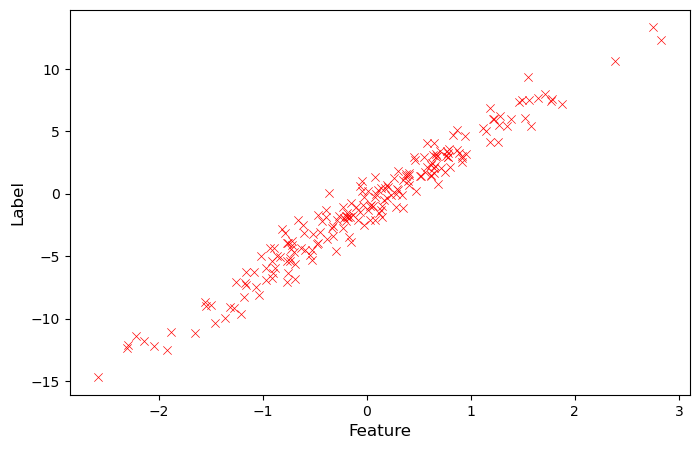

Correlation between features and labels: 0.9792


In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='features', y='labels', color='red', marker='x')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Label', fontsize=12)
plt.show()

print(f"Correlation between features and labels: {df['features'].corr(df['labels']):.4f}")

# correlation is very close to one, plus the graph looks linear

# Data Preprocessing

* hint : don't forget to normalize features ;;;; Okay

In [18]:
# read data here
X_raw = df['features']
y_raw = df['labels']

print(f"X shape: {X_raw.shape}")
print(f"y shape: {y_raw.shape}")

X shape: (200,)
y shape: (200,)


In [29]:
# normalize 

X_norm = (X_raw - X_raw.mean()) / X_raw.std()
y_norm = (y_raw - y_raw.mean()) / y_raw.std()

print(f"Before — X mean: {X_raw.mean():.4f}, std: {X_raw.std():.4f}")
print(f"After  — X mean: {X_norm.mean():.4f}, std: {X_norm.std():.4f}")

Before — X mean: 0.0059, std: 0.9550
After  — X mean: -0.0000, std: 1.0000


In [30]:
# convert to np arrays and add bias to the features here
X = np.column_stack((np.ones(len(X_norm)), X_norm.values))  # shape: (200, 2)
y = y_norm.values.reshape(-1, 1)  # shape: (200, 1)

print(f"X shape: {X.shape}  — col 0 = bias (1s), col 1 = feature")
print(f"y shape: {y.shape}")
print(f"\nFirst 3 rows of X:\n{X[:3]}")

X shape: (200, 2)  — col 0 = bias (1s), col 1 = feature
y shape: (200, 1)

First 3 rows of X:
[[1.         0.60215475]
 [1.         0.00114319]
 [1.         0.79620244]]


# Model Construction

* hint : use vectors operations not looping

* Hypothesis Function
$$\hat{y} = X \cdot w^T$$

In [21]:
def f(X, w):
    """Hypothesis (prediction) function: linear model"""
    # y_hat = X · w^T
    # X is (200, 2), w is (1, 2) → result is (200, 1)
    return X @ w.T

* Cost Function (MSE)
$$J(w) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2$$

In [ ]:
# i copied this from gemini flash 3
def compute_cost(X, y, w):
    """Compute the cost function with mean squared error"""
    # J(w) = (1 / 2m) * sum((y_h - y)^2)
    # The "1/2" is just a convenience — it cancels nicely when we take the derivative
    m = len(y)
    y_h = f(X, w)
    cost = (1 / (2 * m)) * np.sum((y_h - y) ** 2)
    return cost

* Gradient
$$\frac{\partial J}{\partial w} = \frac{1}{m} X^T (\hat{y} - y)$$

In [32]:
def compute_gradient(X, y, w):
    """Compute the gradient of the cost function with respect to weights"""
    # dJ/dw = (1/m) * X^T · (y_h - y)
    # This tells us which direction to nudge w to reduce cost
    m = len(y)
    y_h = f(X, w)
    gradient = (1 / m) * X.T @ (y_h - y)
    return gradient.T  # return as row vector to match w shape

* Gradient Descent Update Rule
$$w = w - \alpha \frac{\partial J}{\partial w}$$

In [34]:
# i copied this from gemini flash 3
def gradient_descent(X, y, w, alpha, iterations):
    """Gradient descent algorithm for linear regression"""
    w_hist = []
    j_hist = []
    
    for i in range(iterations):
        # save history for visualization
        w_hist.append(w.copy()) 
        j_hist.append(compute_cost(X, y, w))
        
        # update weights: w = w - alpha * gradient
        # alpha (learning rate) controls step size
        # too big → overshoots, too small → very slow
        w = w - alpha * compute_gradient(X, y, w)
        
    return w, w_hist, j_hist

# Training

In [35]:
w = np.zeros((1, 2))

alpha = 0.01
iterations = 1000

# train the model using gradient descent
w_final, w_hist, j_hist = gradient_descent(X, y, w, alpha, iterations)

print("-" * 30)
print(f"initial cost: {j_hist[0]:.6f}")
print(f"final cost (Iteration {iterations}): {j_hist[-1]:.6f}")
print(f"final weights: {w_final}")
print("-" * 30)

------------------------------
initial cost: 0.497500
final cost (Iteration 1000): 0.020493
final weights: [[1.39777642e-17 9.79142567e-01]]
------------------------------


# Visualization

## cost history plot

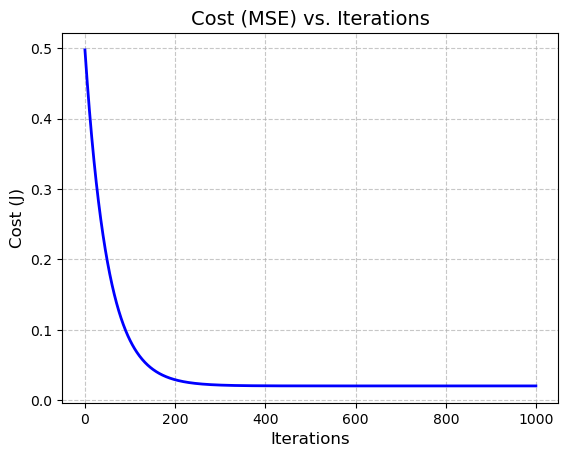

In [26]:
plt.plot(range(iterations), j_hist, color='blue', linewidth=2)
plt.title('Cost (MSE) vs. Iterations', fontsize=14)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Cost (J)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

## final regression line plot vs actual data

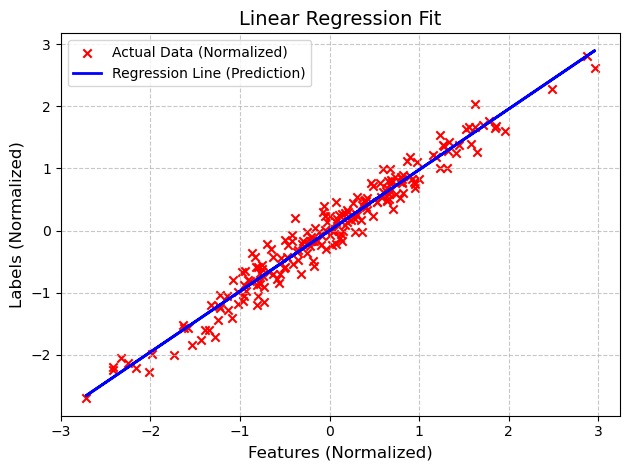

In [27]:
plt.scatter(X[:,1], y, color='red', marker='x', label='Actual Data (Normalized)')

y_pred_line = f(X, w_final)
plt.plot(X[:,1], y_pred_line, color='blue', linewidth=2, label='Regression Line (Prediction)')

plt.title('Linear Regression Fit', fontsize=14)
plt.xlabel('Features (Normalized)', fontsize=12)
plt.ylabel('Labels (Normalized)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## model fit vs actual data over iterations

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(colors='black')

ax.scatter(X[:,1], y, color='red', s=20, zorder=2)

line, = ax.plot([], [], color='blue', linewidth=2, zorder=3)


frames_to_show = list(range(0, iterations, 10))

def init():
    line.set_data([], [])
    return line,

def animate(i):
    w = w_hist[frames_to_show[i]]
    y_pred_line = f(X, w)
    line.set_data(X[:,1], y_pred_line)
    
    ax.set_title(f'Linear Regression fit over data - Iteration: {frames_to_show[i]}', color='black', fontsize=12)
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=len(frames_to_show), interval=50, blit=False)

plt.close() 
display(HTML(ani.to_jshtml()))